In [1]:
import pandas as pd
import typing as T

In [2]:
TRAIN_PATH = "/home/khaymonenko/hse_ml/data/raw/train.csv"
TEST_PATH = "/home/khaymonenko/hse_ml/data/raw/test.csv"

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [8]:
display(train.sample(5))
display(test.sample(5))

,Name,SexuponOutcome,AnimalType,AgeuponOutcome,Breed,Color,DateTime,Outcome,ID
14439,NaN,Spayed Female,Cat,3 months,Domestic Shorthair Mix,Brown Tabby,2014-07-07 19:05:00,0,14439
11344,Frenchie,Spayed Female,Cat,2 months,Domestic Shorthair Mix,Black/White,2013-11-24 17:25:00,0,11344
2918,NaN,Intact Female,Cat,2 years,Domestic Shorthair Mix,Blue Tabby/White,2014-06-08 12:19:00,4,2918
7813,NaN,Intact Female,Cat,3 weeks,Domestic Longhair Mix,Calico,2014-09-23 13:22:00,1,7813
9281,Banjo,Intact Male,Dog,4 years,Blue Lacy Mix,Blue/White,2015-05-21 11:07:00,2,9281


,Name,SexuponOutcome,AnimalType,AgeuponOutcome,Breed,Color,DateTime,ID
7553,Diamond,Spayed Female,Dog,6 years,Chihuahua Shorthair Mix,Tricolor,2014-05-31 19:22:00,7553
2106,NaN,Neutered Male,Cat,3 months,Domestic Shorthair Mix,Blue Tabby/White,2015-08-16 19:18:00,2106
1512,Freddy,Neutered Male,Dog,1 year,Dachshund/Beagle,Tan/White,2015-02-12 18:20:00,1512
2463,Chloe,Spayed Female,Dog,3 years,Labrador Retriever Mix,Brown/White,2014-03-26 09:53:00,2463
5183,Nooli,Neutered Male,Dog,5 years,Silky Terrier Mix,Buff,2014-09-23 12:47:00,5183


## Missed values

In [9]:
train.isna().sum()

Name              5425
SexuponOutcome       1
AnimalType           0
AgeuponOutcome      14
Breed                0
Color                0
DateTime             0
Outcome              0
ID                   0
dtype: int64

In [10]:
test.isna().sum()

Name              2266
SexuponOutcome       0
AnimalType           0
AgeuponOutcome       4
Breed                0
Color                0
DateTime             0
ID                   0
dtype: int64

## Values

In [13]:
from datetime import datetime

In [15]:
dates = train["DateTime"].apply(datetime.fromisoformat)

In [18]:
dates.dt.

0        2
1        4
2        5
3        2
4        0
        ..
18705    1
18706    0
18707    4
18708    6
18709    1
Name: DateTime, Length: 18710, dtype: int32

In [6]:
display(train["SexuponOutcome"].value_counts())
display(test["SexuponOutcome"].value_counts())

SexuponOutcome
Neutered Male    6802
Spayed Female    6223
Intact Female    2466
Intact Male      2438
Unknown           780
Name: count, dtype: int64

SexuponOutcome
Neutered Male    2977
Spayed Female    2597
Intact Male      1087
Intact Female    1045
Unknown           313
Name: count, dtype: int64

In [7]:
display(train["AnimalType"].value_counts())
display(test["AnimalType"].value_counts())

AnimalType
Dog    10936
Cat     7774
Name: count, dtype: int64

AnimalType
Dog    4659
Cat    3360
Name: count, dtype: int64

## Lengths of AgeuponOutcome

In [8]:
train["AgeuponOutcome"].sample(n=5)

2926     3 years
7975     2 years
4739     1 month
13192    3 weeks
9608     4 years
Name: AgeuponOutcome, dtype: object

In [9]:
print(train["AgeuponOutcome"].dropna().apply(len).max())
print(test["AgeuponOutcome"].dropna().apply(len).max())

9
9


In [10]:
def age_to_days(age_str: str) -> int:
    if not age_str:
        return 0

    amount, interval = age_str.split()

    if "month" in interval:
        return int(amount) * 30
    elif "year" in interval:
        return int(amount) * 365
    elif "week" in interval:
        return int(amount) * 7
    elif "day" in interval:
        return int(amount)
    
    raise ValueError(f"Interval {interval} is unknown")

In [11]:
train["DaysUponOutcome"] = train["AgeuponOutcome"].fillna('').apply(age_to_days)
train[["DaysUponOutcome", "AgeuponOutcome"]]

,DaysUponOutcome,AgeuponOutcome
0,60,2 months
1,30,1 month
2,90,3 months
3,730,2 years
4,60,2 months
...,...,...
18705,210,7 months
18706,90,3 months
18707,730,2 years
18708,730,2 years


## Breed

In [12]:
display(train["Breed"].value_counts())
display(test["Breed"].value_counts())

Breed
Domestic Shorthair Mix            6153
Pit Bull Mix                      1318
Chihuahua Shorthair Mix           1225
Labrador Retriever Mix             984
Domestic Medium Hair Mix           590
                                  ... 
Cairn Terrier/Miniature Poodle       1
Jack Russell Terrier/Pointer         1
Whippet/Australian Kelpie            1
Miniature Schnauzer/Shih Tzu         1
Great Dane/Pit Bull                  1
Name: count, Length: 1145, dtype: int64

Breed
Domestic Shorthair Mix                          2657
Pit Bull Mix                                     588
Chihuahua Shorthair Mix                          541
Labrador Retriever Mix                           379
Domestic Medium Hair Mix                         249
                                                ... 
Siberian Husky/Anatol Shepherd                     1
Whippet/Chihuahua Shorthair                        1
Australian Cattle Dog/Parson Russell Terrier       1
Dachshund/Jack Russell Terrier                     1
Pit Bull/Queensland Heeler                         1
Name: count, Length: 752, dtype: int64

## Color

In [13]:
display(train["Color"].value_counts())
display(test["Color"].value_counts())

Color
Black/White                1955
Black                      1594
Brown Tabby                1122
Brown Tabby/White           680
White                       649
                           ... 
Tricolor/Calico               1
Blue Tabby/Orange             1
Black Smoke/Brown Tabby       1
Lynx Point/Brown Tabby        1
Liver Tick/White              1
Name: count, Length: 326, dtype: int64

Color
Black/White            869
Black                  698
Brown Tabby            513
White                  282
Brown/White            262
                      ... 
Blue/Black               1
Black Brindle/Black      1
Blue Tick/Brown          1
Tan/Brown Merle          1
Yellow Brindle/Blue      1
Name: count, Length: 245, dtype: int64

## Datetime

In [50]:
import matplotlib.pyplot as plt

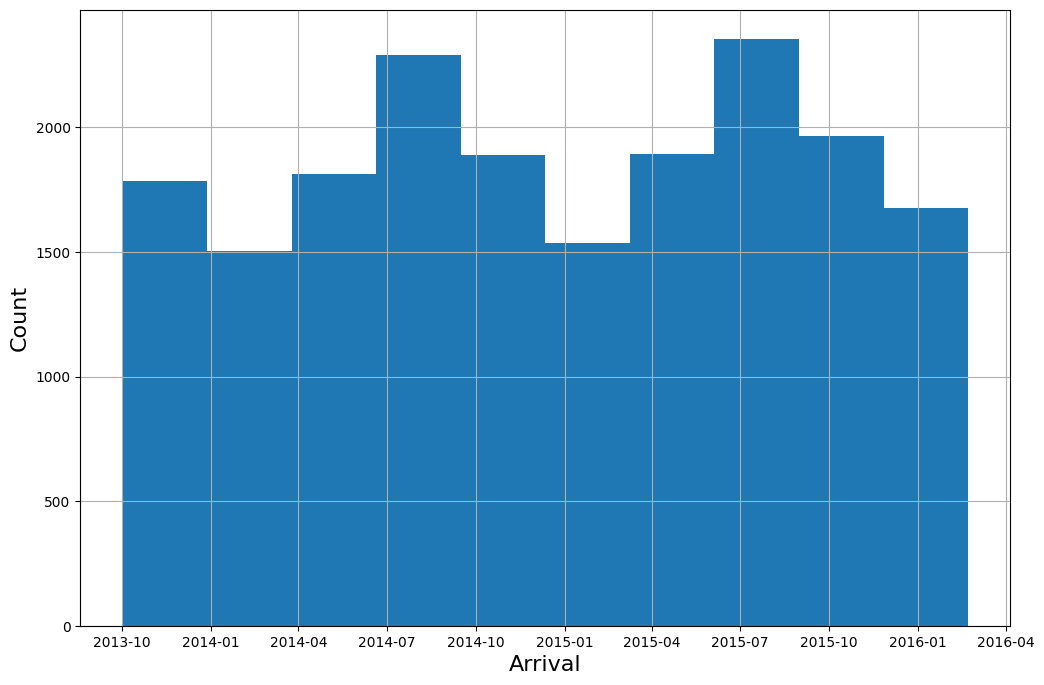

In [53]:
plt.figure(figsize=(12, 8))

plt.hist(train["DateTime"])

plt.xlabel("Arrival", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.grid()
plt.show()

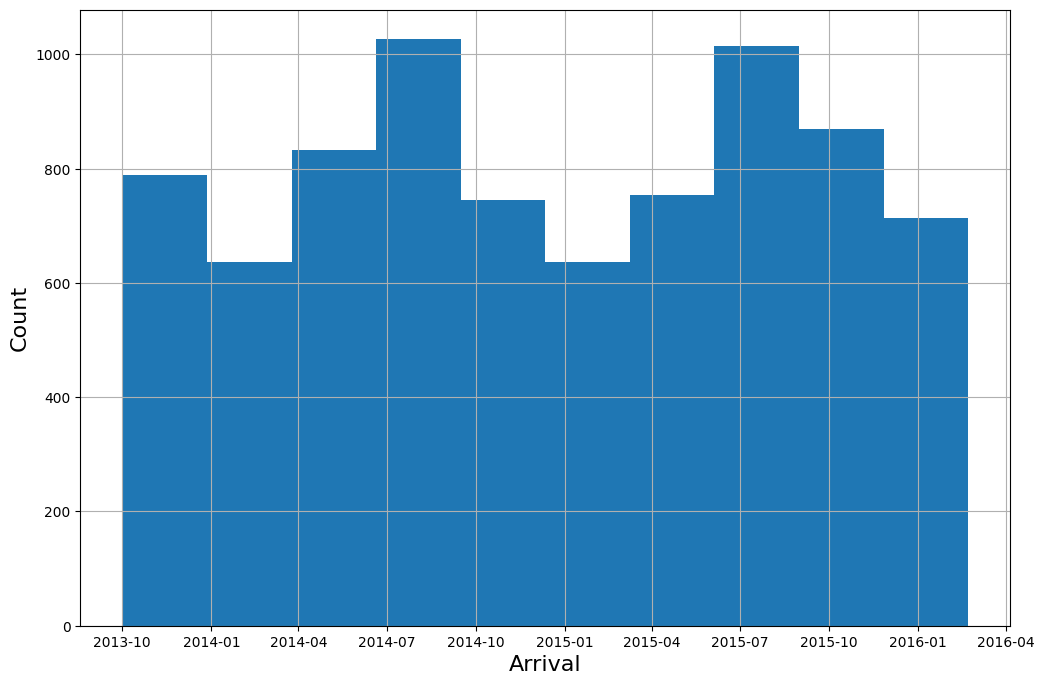

In [54]:
plt.figure(figsize=(12, 8))

plt.hist(test["DateTime"])

plt.xlabel("Arrival", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.grid()
plt.show()

## Labels distribution

In [62]:
train["Outcome"].value_counts()

Outcome
0    7538
1    6595
2    3350
3    1089
4     138
Name: count, dtype: int64